The **complex Fourier series representation** of a square wave involves expressing the wave as a sum of complex exponentials $ e^{j n \omega_0 t} $ rather than sines and cosines. This form is compact and often more convenient for analysis, particularly in signal processing.

### Square Wave Definition

Consider a square wave $ x(t) $ with:
- Amplitude $ A $,
- Period $ T $,
- Alternating values:
  - $ x(t) = A $ for $ 0 \leq t < T/2 $,
  - $ x(t) = -A $ for $ T/2 \leq t < T $.

The wave then repeats with period $ T $.

### Complex Fourier Series Representation

The complex Fourier series for a periodic function $ x(t) $ with period $ T $ is given by:

$
x(t) = \sum_{n=-\infty}^{\infty} X_n e^{j n \omega_0 t},
$

where:
- $ X_n $ are the complex Fourier coefficients (can also be named $C_n$), calculated by:
  $
  X_n = \frac{1}{T} \int_0^T x(t) e^{-j n \omega_0 t} \, dt,
  $
- $ \omega_0 = \frac{2 \pi}{T} $ is the fundamental angular frequency.

### Step 1: Calculate $ X_n $ for the Square Wave

For our square wave $ x(t) $, we compute the complex Fourier coefficients $ X_n $ as follows:

$
X_n = \frac{1}{T} \int_0^T x(t) e^{-j n \omega_0 t} \, dt.
$

Since $ T = 2 $ (for simplicity, assuming $ T = 2 $ in this example), and $ x(t) = A $ for $ 0 \leq t < 1 $ and $ x(t) = -A $ for $ 1 \leq t < 2 $, we can split the integral:

$
X_n = \frac{1}{2} \left( \int_0^1 A e^{-j n \pi t} \, dt + \int_1^2 (-A) e^{-j n \pi t} \, dt \right).
$

### Step 2: Evaluate Each Integral

1. **First Integral** ($ 0 \leq t < 1 $):
   $
   \int_0^1 A e^{-j n \pi t} \, dt = A \left[ \frac{e^{-j n \pi t}}{-j n \pi} \right]_0^1 = \frac{A}{-j n \pi} \left( e^{-j n \pi} - 1 \right).
   $

2. **Second Integral** ($ 1 \leq t < 2 $):
   $
   \int_1^2 -A e^{-j n \pi t} \, dt = -A \left[ \frac{e^{-j n \pi t}}{-j n \pi} \right]_1^2 = \frac{A}{j n \pi} \left( e^{-j 2 n \pi} - e^{-j n \pi} \right).
   $

Since $ e^{-j 2 n \pi} = 1 $ (because $ 2 n \pi $ is a multiple of $ 2 \pi $), we can simplify:

$
X_n = \frac{A}{-j n \pi} \left( e^{-j n \pi} - 1 \right) + \frac{A}{j n \pi} \left( 1 - e^{-j n \pi} \right).
$

Combining terms:

$
X_n = \frac{A}{j n \pi} \cdot 2 \left(1 - (-1)^n\right).
$

### Step 3: Simplify Based on $ n $ (Odd and Even)

For **even $ n $**, $ X_n = 0 $, and for **odd $ n $**:

$
X_n = \frac{2A}{j n \pi} = \frac{-2A j}{n \pi}.
$

### Final Complex Fourier Series for the Square Wave

Thus, the complex Fourier series for the square wave $ x(t) $ is:

$
x(t) = \sum_{\text{odd } n} \frac{-2A j}{n \pi} e^{j n \omega_0 t},
$

where $ n $ takes on all odd integers (both positive and negative), and $ \omega_0 = \frac{2 \pi}{T} $. This representation expresses the square wave as a sum of complex exponentials.

In [1]:
using Plots
using FFTW
using LinearAlgebra

In [2]:
include("../modules/operations.jl");

In [3]:
# Define time range and parameters
L = 1000
t = range(0, stop=2, length=L); @show t; # Time values from 0 to 2

t = 0.0:0.002002002002002002:2.0


In [16]:
# Parameters for the sawtooth wave
A = 1.0            # Amplitude of the sawtooth wave
T = 2.0            # Period of the sawtooth wave
Nₕ = 5       # Number of Fourier terms (harmonics) to use in the approximation
t = 0:0.01:2*T  # Time values over two periods
ω₀ = 2 * π / T;  # Fundamental angular frequency

In [17]:
# Compute the Fourier series approximation of x(t) over the time range
xₜ = [
    (Re(∑((-2j * A / (π * n)) * ℯ^(j * n * ω₀ * tₙ) for n in -Nₕ:Nₕ if n != 0)))
        for tₙ in t
    ];

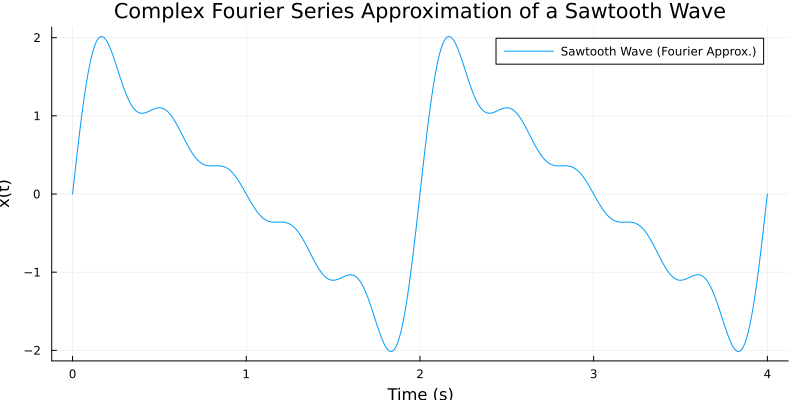

In [18]:
# Plot the result
plot(t, xₜ
    , label="Sawtooth Wave (Fourier Approx.)"
    , xlabel="Time (s)", ylabel="x(t)"
    , title="Complex Fourier Series Approximation of a Sawtooth Wave"
    , size = (800,400)
)